In [2]:
import numpy as np
import pandas as pd
# 와인 데이터셋
# two-class classification
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', dtype = None, delimiter=';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype = None, delimiter=';')

print(data_red)    # 1599 x 12
print(data_white)  # 4898 x 12

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
# input     # 데이터를 numpy의 array로 만들기
X0 = data_red.to_numpy() 
X1 = data_white.to_numpy()

# 샘플의 개수, Dimension
N0,D = X0.shape  # N0 = 1599, D = 12
N1,D = X1.shape  # N1 = 4898, D = 12

# target
t0 = np.zeros(N0, dtype = int)
t1 = np.ones(N1, dtype = int)
print(t0,t1)
# 전체 dataset (학습데이터와 훈련데이터로 쪼개기 전 모든 데이터)
X = np.vstack((X0, X1)) # input, 12차원 입력
t = np.hstack((t0, t1)) # output, target, {0, 1}로 구분
print(X)
print(X.shape)
print(t)

[0 0 0 ... 0 0 0] [1 1 1 ... 1 1 1]
[[ 7.4   0.7   0.   ...  0.56  9.4   5.  ]
 [ 7.8   0.88  0.   ...  0.68  9.8   5.  ]
 [ 7.8   0.76  0.04 ...  0.65  9.8   5.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
(6497, 12)
[0 0 0 ... 1 1 1]


In [14]:
import sklearn.preprocessing
# normalize(정규화)  * 참고 https://hleecaster.com/ml-normalization-concept/
X = sklearn.preprocessing.normalize(X)   
N,D = X.shape
print(X)
print(X.shape)

[[0.19347777 0.01830195 0.         ... 0.01464156 0.24576906 0.13072822]
 [0.10698874 0.01207052 0.         ... 0.00932722 0.13442175 0.06858252]
 [0.13494887 0.01314886 0.00069205 ... 0.01124574 0.16955114 0.08650569]
 ...
 [0.05615295 0.00207334 0.00164139 ... 0.0039739  0.08120581 0.05183349]
 [0.04869593 0.0025676  0.00265614 ... 0.00336445 0.1133287  0.06197663]
 [0.05908598 0.00206801 0.00374211 ... 0.00315125 0.11620244 0.05908598]]
(6497, 12)


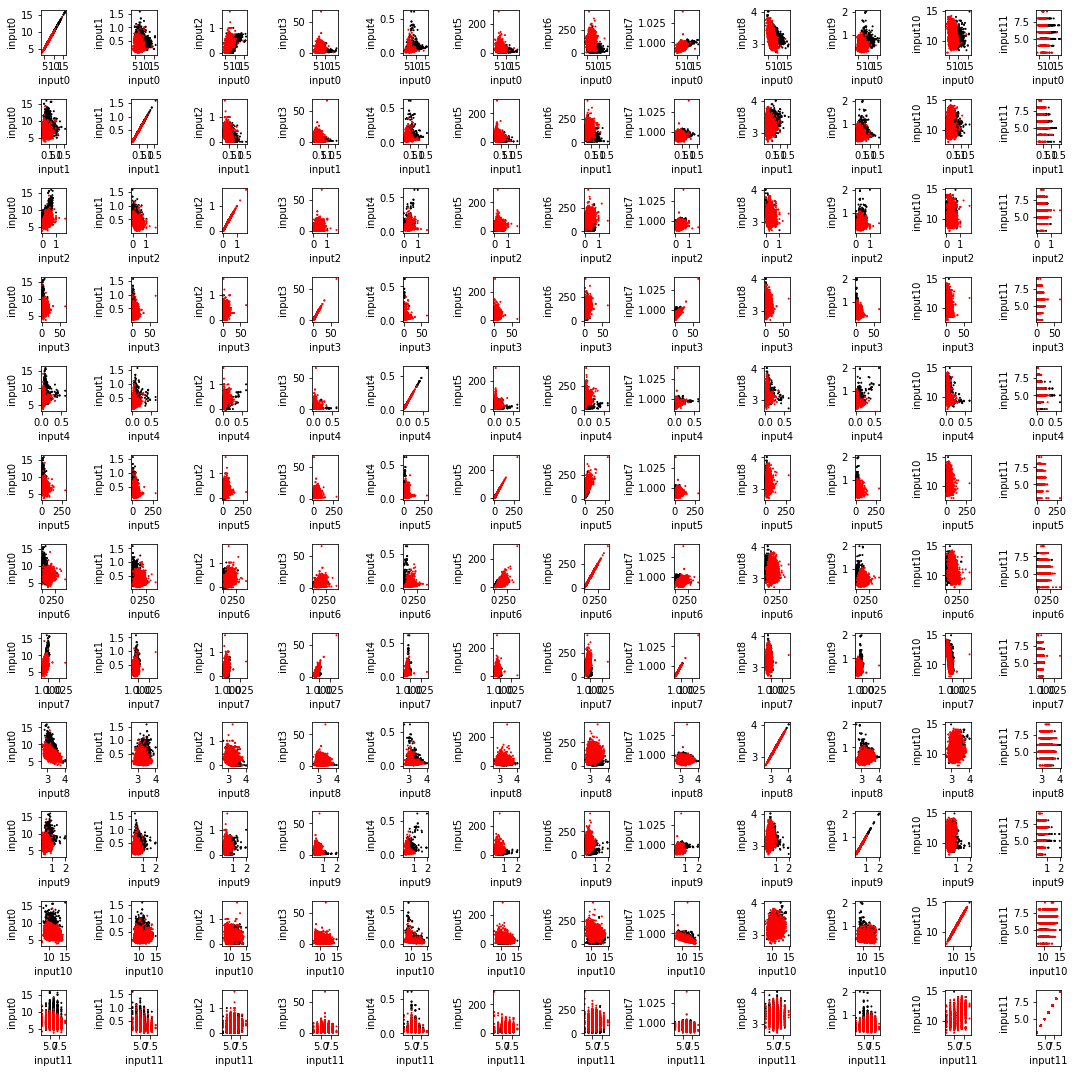

In [4]:
# 데이터의 분포 보기 
# 2차원을 한번에 보여주는게 아니라 
# 12 x 12 개의 subplot에 
# 2개씩 뽑아서 각각 scatter.. 큰 의미 x

import matplotlib
import matplotlib.pyplot as plt

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])

plt.figure(figsize = (15,15))

for i in range(0,D):
    for j in range(0,D):
        plt.subplot(D,D,i*D + j + 1)
        plt.scatter(X[:,i],X[:,j], c = t, s = 1, cmap = cmap_sample, vmin = 0, vmax = +1)
        
        ax = plt.gca()  # axes 개체
        plt.xlabel('input' + str(i))
        plt.ylabel('input' + str(j))
#         ax.axes.xaxis.set_visible(False)  # 축 감추기 (보기 편하게)
#         ax.axes.yaxis.set_visible(False)

plt.tight_layout()

In [17]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# train / test 쪼개기
X_train,X_test,t_train,t_test = train_test_split(X, t, test_size = 0.20)   # 랜덤으로 데이터를 나누어주는 함수
# input X도 tran용, test용으로 적당히 나누어주고 output t(정답)도 train용, test용으로 적당히 나누어준다

# classifier 모델 생성
model1 = svm.SVC(kernel = 'rbf')         # SVC : svm 이용한 classifier, arg는 커널함수
model2 = LogisticRegression()
model3 = Perceptron()

# classifier 모델 학습
model1.fit(X_train,t_train)
model2.fit(X_train,t_train) 
model3.fit(X_train,t_train)

# 예측 수행
t1_train = model1.predict(X_train)
t1_test = model1.predict(X_test)
t2_train = model2.predict(X_train)
t2_test = model2.predict(X_test)
t3_train = model3.predict(X_train)
t3_test = model3.predict(X_test)

# accuracy를 구함                      (정답, 예측)
print(sklearn.metrics.accuracy_score(t_train, t1_train)) # SVM, training accuracy
print(sklearn.metrics.accuracy_score(t_test, t1_test)) # SVM, test accuracy
print(sklearn.metrics.accuracy_score(t_train, t2_train)) # Logistic, training accuracy
print(sklearn.metrics.accuracy_score(t_test, t2_test)) # Logistic, test accuracy
print(sklearn.metrics.accuracy_score(t_train, t3_train)) # Perceptron, training accuracy
print(sklearn.metrics.accuracy_score(t_test, t3_test)) # Perceptron, test accuracy

0.9384260150086589
0.9307692307692308
0.9253415431979989
0.9176923076923077
0.9424668077737156
0.9376923076923077
